## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [19]:
#import libs
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [20]:
#Reading dataset
df_ab=pd.read_csv('ab_data.csv')
df_ab.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [21]:
#number of record on  the dataset 
print('number of record on  the dataset is : ',df_ab.shape)

number of record on  the dataset is :  (294478, 5)


c. The number of unique users in the dataset.

In [22]:
# check of unique value of the features of the dataset 
df_ab.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [23]:
#count all records 
df_ab.user_id.count()

294478

d. The proportion of users converted.

In [24]:
# proportion of users converted
print("The proportion of users converted",round(df_ab['converted'].mean()*100), " %")


The proportion of users converted 12.0  %


e. The number of times the `new_page` and `treatment` don't match.

In [25]:
#filter of what the treatment with the new_page 
df_ab[((df_ab['group'] == 'treatment') == (df_ab['landing_page'] == 'new_page')) == False].shape[0]


3893

Another way to check also 

In [26]:
df_ab[((df_ab['group'] == 'control') == (df_ab['landing_page'] == 'new_page')) == True].shape[0]


3893

f. Do any of the rows have missing values?

In [27]:
#check for missing values
df_ab.isnull().sum()


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

assign the The number of times the new_page and treatment don't match. to new varible to keep result on it 


In [28]:
df_ab2 = df_ab.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')") 
df_ab2.shape[0]

3893



`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [29]:
#take copy of the original data fram 
df_ab2 = df_ab.copy()
#assign the The number of times the new_page and treatment don't match. to new varible to keep result on it
df_ab2 = df_ab.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')")
df_ab2.shape


(290585, 5)

In [30]:
# Check the correct rows were removed - this should be 0
df_ab2[((df_ab2['group'] == 'treatment') == (df_ab2['landing_page'] == 'new_page')) == False].shape[0]
# remove the 3893 not matching data 

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [31]:
#Number of unique user
print("this number of unique user_ids are in df2 ",len(df_ab2['user_id'].unique()))

this number of unique user_ids are in df2  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [32]:
print(" the id of doublicated id is this : ",df_ab2[df_ab2.user_id.duplicated()].user_id.iloc[0])

 the id of doublicated id is this :  773192


c. What is the row information for the repeat **user_id**? 

In [33]:
df_ab2[df_ab2.user_id == 773192]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [34]:
df_ab2.drop(1899, inplace=True)
df_ab2[df_ab2.user_id == 773192]

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [35]:
df_ab2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [36]:
#probability of the converted rate for both control and treatment 
df_ab2.groupby(['group'],as_index=False).mean()

,group,user_id,converted
0,control,788164.072594,0.120386
1,treatment,787845.719290,0.118808


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [37]:
#as above
df_ab2.groupby(['group'],as_index=False).mean()

,group,user_id,converted
0,control,788164.072594,0.120386
1,treatment,787845.719290,0.118808


d. What is the probability that an individual received the new page?

In [38]:
len(df_ab2.query('landing_page == "new_page"'))/len(df_ab2.landing_page)


0.5000619442226688

In [39]:
len(df_ab2.query('landing_page == "old_page"'))/len(df_ab2.landing_page)


0.4999380557773312

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

-  the probabilty of controle higher than treatment 
- The probability above shows of the new page higher than old page 
- the result above not strog more to evidence so we need more statistical rules   to approve which page will be saved and other rejected .
- i need to go in deep on statistics level to approve what page will be still exist on the future  

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


- Null hypothesis  **$p_{new}$**   <=  **$p_{old}$**
- Altranative hypothesis  **$p_{new}$**  > **$p_{old}$**,

- Null hypothesis  of the new_page is less than   or equal the old page 
- Altranative hypothesis of the new higher than the old_page i will try to approve that 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [40]:
all_data=len(df_ab2.landing_page)
all_data

290584

In [41]:
 len(df_ab2.query("(landing_page == 'old_page' and converted == '1'  )"))/all_data


0.06018569501417834

In [42]:
df_ab2['converted'].mean()

0.11959708724499628

In [43]:
p_new =df_ab2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [44]:
p_old =df_ab2.converted.mean()
p_old


0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [45]:
n_new=len(df_ab2.query("(group == 'treatment' and landing_page == 'new_page')"))
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [46]:
n_old=len(df_ab2.query("(group == 'control' and landing_page == 'old_page')"))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [47]:
new_page_converted = np.random.choice([0, 1], n_new, p = [p_new, 1-p_new])
new_page_converted.mean()


0.88040052301975091

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [48]:
old_page_converted = np.random.choice([0, 1], n_old, p = [p_old, 1-p_old])
old_page_converted.mean()

0.88013684485868082

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [49]:
obs_diff= new_page_converted.mean() - old_page_converted.mean()# differences computed in from p_new and p_old
obs_diff

0.00026367816107009112

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [50]:
p_diffs = []

for _ in range(10000):
    new_converted_simulation = np.random.binomial(n_new,p_new)/n_new
    old_converted_simulation = np.random.binomial(n_old,p_old)/n_old
    diff = new_converted_simulation - old_converted_simulation 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

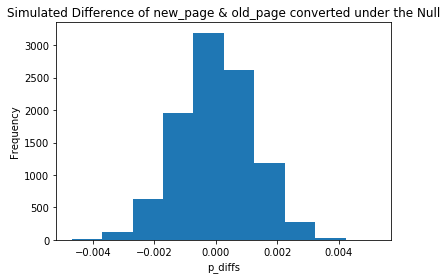

In [51]:

p_diffs = np.array(p_diffs)

# plot sampling distribution
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Simulated Difference of new_page & old_page converted under the Null');

In [52]:
_control = df_ab2.query('group == "control"')
_treatment = df_ab2.query('group == "treatment"')

# display observed difference
observed_diff =_treatment.converted.mean() - _control.converted.mean()
observed_diff

-0.0015782389853555567

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

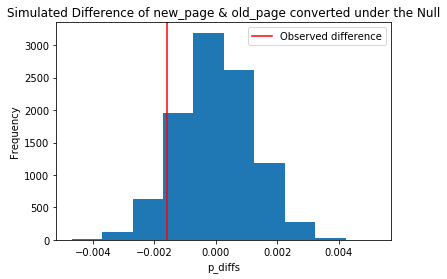

In [53]:

# plot line for observed statistic
plt.hist(p_diffs)
plt.axvline(x=observed_diff, color='r', label="Observed difference")
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Simulated Difference of new_page & old_page converted under the Null');
plt.legend()
plt.show()

In [54]:
#What does this value mean in terms of whether or not there is a difference between the new and old pages?
(p_diffs > observed_diff).mean()*100

90.390000000000001

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

-  scientific studies is ther area of error margin or the area of rjection 
- 90.579 % is the proportion of the p_diffs that are greater than the actual difference observed in Dataset.
- Alpha = 1- confidence level = 5%
- p-value the area corresponding to z or t-test 
- if p-value <Alpha   we will reject the H0
- IF P-VALUE >= Alpha  we will accept H0 
-  we cannot reject the null hypothesis and that we do not have sufficient evidence that the new_page has a higher conversion rate than the old_page.



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [56]:

import statsmodels.api as sm

n_new = len(df_ab2.query('landing_page == "new_page"'))
n_old = len(df_ab2.query('landing_page == "old_page"'))
convert_new = len(df_ab2.query('landing_page == "new_page" & converted == 1'))
convert_old = len(df_ab2.query('landing_page == "old_page" & converted == 1'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [57]:

convert_new, convert_old

(17264, 17489)

In [58]:

n_new, n_old

(145310, 145274)

In [59]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller', prop_var=False)

print('z-score is : ',z_score,'and ','p-value is : ' ,p_value)

z-score is :  1.31092419842 and  p-value is :  0.905058312759


<b>i try for that create the area under the curve  please help me on it to complete or tell me is that true 

In [60]:
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np

In [61]:
std_a = np.sqrt(p_old * (1 - p_old) / n_old)
std_b = np.sqrt(p_new * (1 - p_new) / n_new)
std_a,std_b

(0.00085134793972747749, 0.0008512424740873656)

In [62]:
f=std_a-std_b
f

1.0546564011189048e-07

In [63]:

p = norm(p_new - p_old, np.sqrt(std_a**2 + std_b**2))


In [64]:
np.sqrt(std_a**2 + std_b**2)

0.0012039132295014454

zscore is 1.311, with p-value 0.095


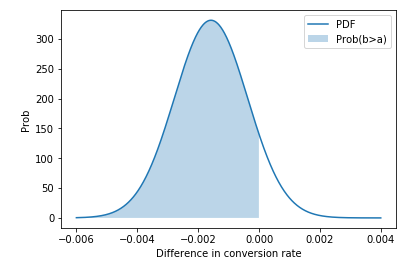

In [65]:
#z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
#p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))

z_score = 1.3109241984234394
p = norm(-0.0015782389853555567, 0.0012039132295014454)

x = np.linspace(-0.006, 0.004, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x<=0, label="Prob(b>a)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02,0.004 ))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- z_score, p_value
- (1.3109241984234394, 0.90505831275902449)

In [66]:
c=0.95
alpha=1-c
print ('alpha value = ' ,alpha)
print ('p_value     = ' ,p_value)
print ('z_score,     = ' ,z_score)
print ('critical interval between ,   -1.96 and + 1.96   and  z_ score' ,1.3109,"on that Area so we will keep H0")

alpha value =  0.050000000000000044
p_value     =  0.905058312759
z_score,     =  1.3109241984234394
critical interval between ,   -1.96 and + 1.96   and  z_ score 1.3109 on that Area so we will keep H0


p-value larger than the alpha so we will accept the null hypothesis. and we not need to make any evidance so we will keep old page 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<b> Regaring for basic info about the regression if it continuous values  we should used liner regression or multi linear regression but in that case our output or prediction labeled is a binary classification for a conversion or no conversion so we will used logistic regression to predict 0 or 1 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [70]:
# convert the target column into dump variable or categorical values
df_ab2[['control','treatment']]= pd.get_dummies(df_ab2['group'])
df_ab2 = df_ab2.drop('control',axis = 1)

df_ab2.head()

,user_id,timestamp,group,landing_page,converted,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [71]:
df_ab3 = df_ab2.rename(columns={'treatment': 'a/b_page'})
df_ab3.head()

,user_id,timestamp,group,landing_page,converted,a/b_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [72]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
df_ab3['intercept'] = 1
lm = sm.Logit(df_ab3['converted'],df_ab3[['intercept','a/b_page']])
results = lm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [73]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        13:53:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
a/b_page      -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

on the **Part II** we calc the p-value is 0.905 because we work on one tail and i choose one tail because  

on **Part II**

p-value is 0.905 and greater than alpha 0.05 

on **Part III**

because here on regression we used 2 tials so alpha her divided by 2 

In [87]:
alpha=0.037/2
alpha

0.0185

p-value is 0.190- Also greater than the Alpha 0.0185

- H0 **$p_{new}$**  <= **$p_{old}$**
- Altranative hypothesis **$p_{new}$**  > **$p_{old}$**
- so i used only one tail 
- but on logistic regression 
- user 
    - h0 : p_new =p_old 
  
  SO 
  - h1 : p_new != p_old 
- so logistic regression used 2 tails  
- below the code prove that 

In [88]:
np.exp(-0.190/2)

0.90937293446823142

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- for any way to raise the accuracy or any way to improve any dataset numberone increase the number of observation or increase the number of the fearure and new feature of the location or counrties very imporant because for any update i need to whach country user make more action for the old or the new page 
- for the regression or any alogrithm for machine learning like logistic regression we used it need more feature to raise the the performance of that model but infact this improvement such regrding for what the important for adding that feature 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [89]:
countries_dataset = pd.read_csv('./countries.csv')
new_ab_dataset = countries_dataset.set_index('user_id').join(df_ab3.set_index('user_id'), how='inner')

In [90]:
new_ab_dataset.head()

,country,timestamp,group,landing_page,converted,a/b_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [91]:

new_ab_dataset.head()
new_ab_dataset.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [92]:
#mean of conversion rate
new_ab_dataset['a/b_page'].mean()

0.50006194422266881

In [93]:
#mean conversion rate by country
new_ab_dataset.groupby(['country'], as_index=False).mean()

,country,converted,a/b_page,intercept
0,CA,0.115318,0.503552,1.0
1,UK,0.120594,0.498247,1.0
2,US,0.119547,0.500459,1.0


In [94]:
#mean conversion rate by landing_page 
new_ab_dataset.groupby(['a/b_page'], as_index=False).mean()

,a/b_page,converted,intercept
0,0,0.120386,1.0
1,1,0.118808,1.0


In [95]:
# Create the necessary dummy variables
new_ab_dataset[['CA','UK', 'US']]= pd.get_dummies(new_ab_dataset['country'])

new_ab_dataset.head()

,country,timestamp,group,landing_page,converted,a/b_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [98]:
### Fit Your Linear Model And Obtain the Results

new_ab_dataset['intercept'] = 1

lm = sm.Logit(new_ab_dataset['converted'],new_ab_dataset[['intercept','a/b_page','CA','US']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Aug 2020   Pseudo R-squ.:               2.323e-05
Time:                        14:02:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
a/b_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

<b>P-value of country "CA" IS 0.074 AND P-value of country "US" IS 0.457 Also greater than 0.05 of the Alpha value so we still can not reject the Null hypothesis so the country not effect for the result we still keep on the old page 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

<b>Regarding for for above summary the p-value still high so we still forced to keep null  hypothesis (H0) And ignore any alternative  hypothesis  because no any effect for adding new feature and i think if i make any intersection between the countires and newpage interaction i believe also the p-value will be higher than the alpha so we will keep the Null  hypothesis  

------------------------------

<b>Try with interaction on the country with the new_Page

In [102]:
new_ab_dataset['US_ab_page'] = new_ab_dataset['US'] * new_ab_dataset['a/b_page']
new_ab_dataset['CA_ab_page'] = new_ab_dataset['CA'] * new_ab_dataset['a/b_page']
new_ab_dataset.head()

,country,timestamp,group,landing_page,converted,a/b_page,intercept,CA,UK,US,US_ab_page,CA_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0


In [105]:
model = sm.Logit(new_ab_dataset.converted, new_ab_dataset[['intercept', 'a/b_page', 'CA', 'US', 'CA_ab_page', 'US_ab_page']])
model.fit(disp=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Aug 2020   Pseudo R-squ.:               3.482e-05
Time:                        14:12:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
a/b_page       0.0108      0.023      0.475      0.635      -0.034       0.056
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
US             0.0057      0.019      0.306      0.760      -0.031       0.043
CA_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
US_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

<b>regarding for the above Result the new interaction between countries and new_page 
the p-value of CA_ab_page=0.168 and also US_ab_page also=0.238 both of them greater than Alpha=0.05 so we still accept the Nullhypothesis and keep the old_page 

### Conclusions

<b>this very exiting project be try to evidence the alternative hypothesis by statistical way by z score and p-value and we not success to prove that because p-value still high and finally we add another feature to the original dataset 
and joined to gether and make relation between their but also no update we still keep the old page and though for another feature weight more and more effictivly to the new page because till now we can not find any feature to make more effectiveness on the new page   

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [189]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0